In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
##List the parameters given in the design problem
N,fc,fs=map(int,input().split())        #Filter order,  #Cutoff frequency ,  #Sampling frequency
cutoff=fc/(fs/2)       #Calculate Normalized digital cutoff requency w.r.t. Nyquist rate

25 2000 10000


In [5]:
b_rect = signal.firwin(N,cutoff,window="boxcar",pass_zero="highpass")              #Call filter design function using Rectangular window 
b_black = signal.firwin(N,cutoff,window="blackman",pass_zero="highpass")              #Call filter design function using Hamming window

In [7]:
##Determine Frequency response of the filters
w,h_rect = signal.freqz(b_rect,a=1)              #Calculate response h at specified frequency points w for Rectangular window
w,h_black =signal.freqz(b_black,a=1)             #Calculate response h at specified frequency points w for Blackman window

##Compute magnitude response of the filters
h_dB_rect = 20*np.log10(abs(h_rect))            #Calculate magnitude in decibels for Rectangular window
h_dB_black =20*np.log10(abs(h_black))           #Calculate magnitude in decibels for Blackman window

##Compute phase respons of the filter
h_Phase_rect = np.unwrap(np.arctan2(np.imag(h_rect),np.real(h_rect)))         #Calculate phase of Rectangular window
h_Phase_black =np.unwrap(np.arctan2(np.imag(h_rect),np.real(h_black)))        #Calculate phase of Blackman window


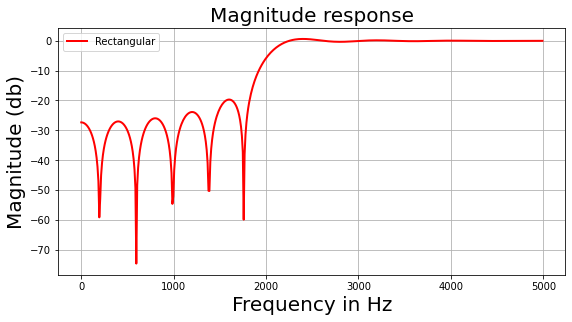

In [9]:
##Magnitude response of Rectangular Window
fig = plt.figure(figsize=(20, 10))
sub1 = plt.subplot(2, 2, 1)
sub1.plot(w*fs/(2*np.pi),h_dB_rect,'r', label='Rectangular', linewidth='2')           #Digital frequency w converted in analog frequency
sub1.set_ylabel('Magnitude (db)', fontsize=20)
sub1.set_xlabel('Frequency in Hz', fontsize=20)
sub1.set_title('Magnitude response', fontsize=20)
sub1.legend()
#sub1.axis=([0,  fs/2,  -80,  5])
sub1.grid()

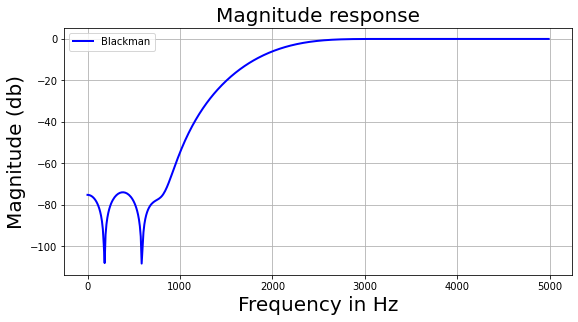

In [10]:
 fig = plt.figure(figsize=(20, 10))
####Magnitude response of Blackman Window
sub2 = plt.subplot(2, 2, 2)
sub2.plot(w*fs/(2*np.pi),h_dB_black,'b', label='Blackman', linewidth='2')                 #Digital frequency w converted in analog frequency
sub2.set_ylabel('Magnitude (db)', fontsize=20)
sub2.set_xlabel('Frequency in Hz', fontsize=20)
sub2.set_title('Magnitude response', fontsize=20)
sub2.legend()
#sub2.axis=([0,  fs/2,  -80,  5])
sub2.grid()

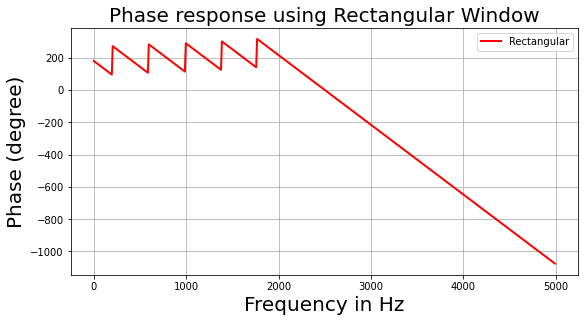

In [11]:
fig = plt.figure(figsize=(20, 10))
####Phase response of Rectangular Window
sub3 = plt.subplot(2, 2, 3)
sub3.plot(w*fs/(2*np.pi),h_Phase_rect*180/np.pi, 'r', label='Rectangular', linewidth='2')              #Digital frequency w converted in analog frequency and phase in degree
sub3.set_ylabel('Phase (degree)', fontsize=20)
sub3.set_xlabel('Frequency in Hz', fontsize=20)
sub3.set_title('Phase response using Rectangular Window', fontsize=20)
sub3.legend()
sub3.grid()

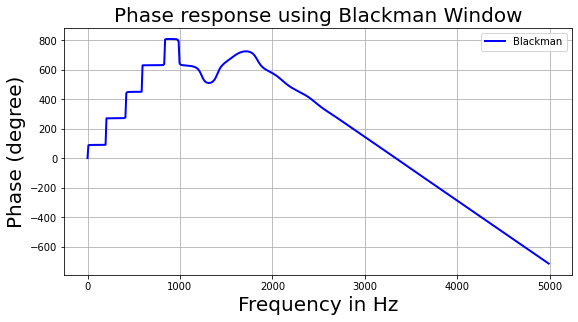

In [12]:
fig = plt.figure(figsize=(20, 10))
####Phase response of Blackman Window
sub4 = plt.subplot(2, 2, 4)
sub4.plot(w*fs/(2*np.pi),h_Phase_black*180/np.pi, 'b', label='Blackman', linewidth='2')   #Digital frequency w converted in analog frequency and phase in degree
sub4.set_ylabel('Phase (degree)', fontsize=20)
sub4.set_xlabel('Frequency in Hz', fontsize=20)
sub4.set_title('Phase response using Blackman Window', fontsize=20)
sub4.legend()
sub4.grid()